In [32]:
# Dependencies
#ELO
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [33]:
#%run Graphs.ipynb

{'dataset': {'collapse': None,
             'column_index': None,
             'column_names': ['Date',
                              '1st 20%',
                              '2nd 40%',
                              '3rd 60%',
                              '4th 80%',
                              'Median',
                              'Average',
                              'Units'],
             'data': [['2020-09-30',
                       500000.0,
                       615000.0,
                       725000.0,
                       950000.0,
                       660000.0,
                       855467.0,
                       1579.0],
                      ['2020-08-31',
                       510000.0,
                       625000.0,
                       750000.0,
                       960000.0,
                       680000.0,
                       830097.0,
                       1299.0],
                      ['2020-07-31',
                       490000.0,
       

                       260000.0,
                       190000.0,
                       216598.0,
                       2304.0],
                      ['1997-05-31',
                       150000.0,
                       175000.0,
                       210000.0,
                       275000.0,
                       190000.0,
                       225065.0,
                       2142.0],
                      ['1997-04-30',
                       150000.0,
                       180000.0,
                       215000.0,
                       270000.0,
                       195000.0,
                       225905.0,
                       2150.0],
                      ['1997-03-31',
                       150000.0,
                       180000.0,
                       210000.0,
                       265000.0,
                       190000.0,
                       217086.0,
                       1847.0],
                      ['1997-02-28',
                       152000.0

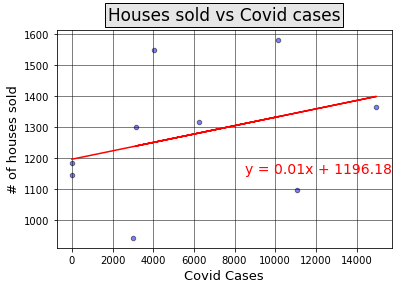

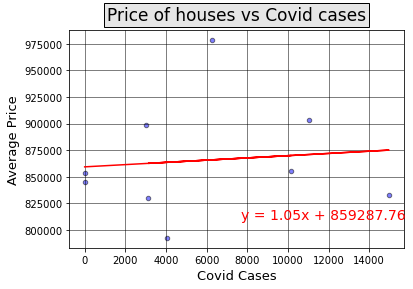

In [34]:
%run Sold_price_1.ipynb
%run Interest_rates_emr.ipynb
%run 1.CSV_CovidCases_ON.ipynb

In [35]:
final_df.head()


,Date,Average,Units,Number_of_Cases
0,01/2020,844830.0,1144.0,3
1,02/2020,853468.0,1184.0,14
2,03/2020,898243.0,943.0,3006
3,04/2020,832860.0,1365.0,14970
4,05/2020,903186.0,1098.0,11050


In [36]:
interest_rate_groupped_df

,Date,Estimated variable mortgage rate
0,01/2019,2.7680
1,01/2020,2.8960
2,02/2019,2.8075
3,02/2020,2.8900
4,03/2019,2.8875
5,03/2020,2.6100
6,04/2019,2.8800
7,04/2020,2.3420
8,05/2019,2.8820
9,05/2020,2.2400


In [37]:
Reported_cases_per_month_ON

,Number_of_Cases,Date
0,3,01/2020
1,14,02/2020
2,3006,03/2020
3,14970,04/2020
4,11050,05/2020
5,6266,06/2020
6,4061,07/2020
7,3139,08/2020
8,10133,09/2020
9,24627,10/2020


In [38]:
# Study data files
#interest_rate_path = "Final_Resources/2. interest_rate_ELO.csv"
#covid_path = "Final_Resources/1. COVID_Reported_cases_per_month_ON.csv"

#interest_rate = pd.read_csv(interest_rate_path)
#covid_cases = pd.read_csv(covid_path)

# Combine the data into a single dataset
combine_df = pd.merge(interest_rate_groupped_df,Reported_cases_per_month_ON, how='inner', on='Date')
#combine_df
#combine_df['Number_of_Cases'] = combine_df['Number_of_Cases'].cumsum()
# Display the data table for preview
combine_df
#combine_df.dtypes
#combine_df['Estimated variable mortgage rate']
#new_df = pd.DataFrame({'Cases': combine_df['Number_of_Cases'],
 #                     'Interest': combine_df['Estimated variable mortgage rate']})

,Date,Estimated variable mortgage rate,Number_of_Cases
0,01/2020,2.8960,3
1,02/2020,2.8900,14
2,03/2020,2.6100,3006
3,04/2020,2.3420,14970
4,05/2020,2.2400,11050
5,06/2020,2.1125,6266
6,07/2020,2.0200,4061
7,08/2020,1.9625,3139
8,09/2020,1.9275,10133
9,10/2020,1.8860,24627


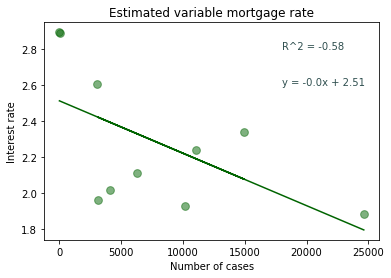

In [42]:
#Covid cases vs. interest rate

combine_df.plot(kind="scatter",x="Number_of_Cases",y="Estimated variable mortgage rate",s=60, c='darkgreen', edgecolors="darkgreen",alpha=0.5)
title = "Estimated variable mortgage rate"
plt.title(title)

correlation_coef = round(st.pearsonr(combine_df['Number_of_Cases'],combine_df['Estimated variable mortgage rate'])[0],2)

corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(combine_df['Number_of_Cases'],combine_df['Estimated variable mortgage rate'])
tw_fit = tw_slope * combine_df['Number_of_Cases'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(combine_df['Number_of_Cases'],tw_fit,"darkgreen")

plt.annotate(corr_coef,(18000,2.8), fontsize = 10, color="darkslategrey")
plt.annotate(reg_eq,(18000,2.6), fontsize = 10, color="darkslategrey")

plt.ylabel("Interest rate")
plt.xlabel("Number of cases")
plt.savefig('Pictures/Int_rates vs cases.png')
plt.show()


In [40]:
#Covid cases vs. house sold

Covid_cases_vs_house_sold_combine_df = pd.merge(Reported_cases_per_month_ON,final_df, how='inner', on='Date')
Covid_cases_vs_house_sold_combine_df['Number_of_Cases'] = combine_df['Number_of_Cases'].cumsum()
Covid_cases_vs_house_sold_combine_df.head()

,Number_of_Cases_x,Date,Average,Units,Number_of_Cases_y,Number_of_Cases
0,3,01/2020,844830.0,1144.0,3,3
1,14,02/2020,853468.0,1184.0,14,17
2,3006,03/2020,898243.0,943.0,3006,3023
3,14970,04/2020,832860.0,1365.0,14970,17993
4,11050,05/2020,903186.0,1098.0,11050,29043


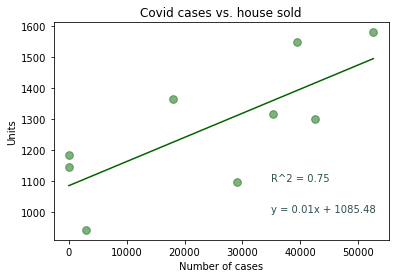

In [41]:
Covid_cases_vs_house_sold_combine_df.plot(kind="scatter",x="Number_of_Cases",y="Units",s=60, c='darkgreen', edgecolors="darkgreen",alpha=0.5)
title = "Covid cases vs. house sold"
plt.title(title)

correlation_coef = round(st.pearsonr(Covid_cases_vs_house_sold_combine_df['Number_of_Cases'],Covid_cases_vs_house_sold_combine_df['Units'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(Covid_cases_vs_house_sold_combine_df['Number_of_Cases'],Covid_cases_vs_house_sold_combine_df['Units'])
tw_fit = tw_slope * Covid_cases_vs_house_sold_combine_df['Number_of_Cases'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(Covid_cases_vs_house_sold_combine_df['Number_of_Cases'],tw_fit,"darkgreen")

plt.annotate(corr_coef,(35000,1100),fontsize = 10, color="darkslategrey")
plt.annotate(reg_eq,(35000,1000), fontsize = 10, color="darkslategrey")

plt.ylabel("Units")
plt.xlabel("Number of cases")
plt.show()

In [26]:
#Covid cases vs. house price
Covid_cases_vs_house_price_combine_df = pd.merge(Reported_cases_per_month_ON,final_df, how='inner', on='Date')
Covid_cases_vs_house_price_combine_df['Number_of_Cases'] = combine_df['Number_of_Cases'].cumsum()
Covid_cases_vs_house_price_combine_df.head()

,Number_of_Cases_x,Date,Average,Units,Number_of_Cases_y,Number_of_Cases
0,3,01/2020,844830.0,1144.0,3,3
1,14,02/2020,853468.0,1184.0,14,17
2,3006,03/2020,898243.0,943.0,3006,3023
3,14970,04/2020,832860.0,1365.0,14970,17993
4,11050,05/2020,903186.0,1098.0,11050,29043


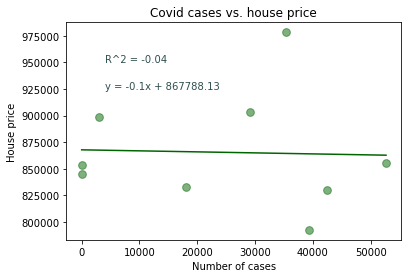

In [31]:
Covid_cases_vs_house_sold_combine_df.plot(kind="scatter",x="Number_of_Cases",y="Average",s=60, c='darkgreen', edgecolors="darkgreen",alpha=0.5)
title = "Covid cases vs. house price"
plt.title(title)

correlation_coef = round(st.pearsonr(Covid_cases_vs_house_sold_combine_df['Number_of_Cases'],Covid_cases_vs_house_sold_combine_df['Average'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(Covid_cases_vs_house_sold_combine_df['Number_of_Cases'],Covid_cases_vs_house_sold_combine_df['Average'])
tw_fit = tw_slope * Covid_cases_vs_house_sold_combine_df['Number_of_Cases'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(Covid_cases_vs_house_sold_combine_df['Number_of_Cases'],tw_fit,"darkgreen")

plt.annotate(corr_coef,(4000,950000),fontsize = 10, color="darkslategrey")
plt.annotate(reg_eq,(4000,925000), fontsize = 10, color="darkslategrey")

plt.ylabel("House price")
plt.xlabel("Number of cases")
plt.show()